<a href="https://colab.research.google.com/github/akiwelekar/5CI_quantumPhenomenon/blob/main/BlochSphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

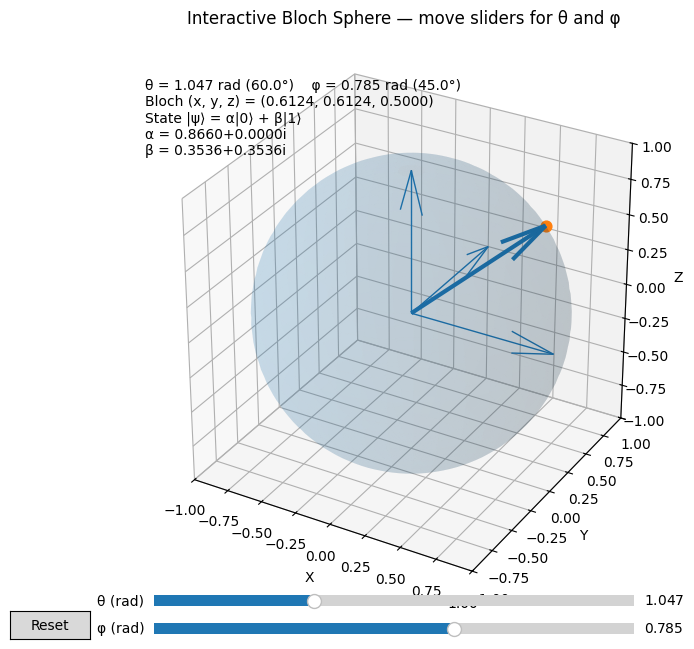

In [1]:
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (ensures 3D projection is available)

def state_from_angles(theta, phi):
    """Return (alpha, beta) amplitudes for given theta, phi (radians)."""
    alpha = np.cos(theta / 2)
    beta = np.exp(1j * phi) * np.sin(theta / 2)
    # normalization (should be 1, but keep for robustness)
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    return alpha / norm, beta / norm

def bloch_coords(alpha, beta):
    """Return Bloch vector (x, y, z) from amplitudes α, β."""
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return x, y, z

# Initial angles (radians)
theta0 = np.pi / 3
phi0 = np.pi / 4

alpha0, beta0 = state_from_angles(theta0, phi0)
x0, y0, z0 = bloch_coords(alpha0, beta0)

# Create figure and 3D axis for Bloch sphere
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

# Sphere surface
u, v = np.mgrid[0:2*np.pi:80j, 0:np.pi:40j]
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)
ax.plot_surface(xs, ys, zs, alpha=0.12, linewidth=0, edgecolor='none')

# Draw unit coordinate axes
ax.quiver(0, 0, 0, 1, 0, 0, linewidth=1)
ax.quiver(0, 0, 0, 0, 1, 0, linewidth=1)
ax.quiver(0, 0, 0, 0, 0, 1, linewidth=1)

# Plot initial state vector and point
vec = ax.quiver(0, 0, 0, x0, y0, z0, linewidth=3)
point = ax.scatter([x0], [y0], [z0], s=60)

# Text box to show amplitudes and coordinates (2D overlay)
text_box = ax.text2D(0.02, 0.95, "", transform=ax.transAxes, fontsize=10, va='top')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])
plt.title("Interactive Bloch Sphere — move sliders for θ and φ", pad=20)

# Slider axes placed below the figure
slider_ax_theta = plt.axes([0.2, 0.08, 0.6, 0.03])
slider_ax_phi   = plt.axes([0.2, 0.04, 0.6, 0.03])

slider_theta = Slider(slider_ax_theta, 'θ (rad)', 0.0, np.pi, valinit=theta0)
slider_phi   = Slider(slider_ax_phi,   'φ (rad)', -np.pi, np.pi, valinit=phi0)

def update(val):
    theta = slider_theta.val
    phi = slider_phi.val
    alpha, beta = state_from_angles(theta, phi)
    x, y, z = bloch_coords(alpha, beta)

    # remove previous vector & point and draw new
    global vec, point
    vec.remove()
    point.remove()
    vec = ax.quiver(0, 0, 0, x, y, z, linewidth=3)
    point = ax.scatter([x], [y], [z], s=60)

    # Update text with rounded numeric values
    info = (
        f"θ = {theta:.3f} rad ({np.degrees(theta):.1f}°)    "
        f"φ = {phi:.3f} rad ({np.degrees(phi):.1f}°)\n"
        f"Bloch (x, y, z) = ({x:.4f}, {y:.4f}, {z:.4f})\n"
        f"State |ψ⟩ = α|0⟩ + β|1⟩\n"
        f"α = {alpha.real:.4f}{'+' if alpha.imag>=0 else '-'}{abs(alpha.imag):.4f}i\n"
        f"β = {beta.real:.4f}{'+' if beta.imag>=0 else '-'}{abs(beta.imag):.4f}i\n"
    )
    text_box.set_text(info)
    fig.canvas.draw_idle()

# Initialize and connect sliders
update(None)
slider_theta.on_changed(update)
slider_phi.on_changed(update)

# Reset button
reset_ax = plt.axes([0.02, 0.04, 0.1, 0.04])
button = Button(reset_ax, 'Reset', hovercolor='0.975')
def reset(event):
    slider_theta.reset()
    slider_phi.reset()
button.on_clicked(reset)

plt.show()


# Visualizing Quantum States: An Interactive Bloch Sphere with Matplotlib

Quantum computing often involves visualizing the state of a qubit, the fundamental unit of quantum information. The Bloch sphere is a geometric representation that provides a useful way to understand the pure state of a single qubit. This article will walk you through a Python script that uses Matplotlib to create an interactive Bloch sphere, allowing you to explore how different quantum states are mapped onto the sphere's surface by adjusting the spherical coordinates θ and φ.

## Understanding the Bloch Sphere

A single qubit can be in a superposition of two basis states, |0⟩ and |1⟩. Its state can be represented as a linear combination:

|ψ⟩ = α|0⟩ + β|1⟩

where α and β are complex probability amplitudes such that |α|² + |β|² = 1.

The Bloch sphere maps this 2D complex vector space onto a 3D sphere of unit radius. The state |0⟩ is at the north pole (0, 0, 1), and the state |1⟩ is at the south pole (0, 0, -1). Any pure state |ψ⟩ can be represented by a point on the surface of the sphere, defined by two angles:

*   **θ (theta):** The polar angle, measured from the positive z-axis (ranging from 0 to π).
*   **φ (phi):** The azimuthal angle, measured from the positive x-axis in the xy-plane (ranging from 0 to 2π, or sometimes -π to π).

The relationship between the amplitudes (α, β) and the angles (θ, φ) is:

α = cos(θ/2)
β = e^(iφ) sin(θ/2)

The Cartesian coordinates (x, y, z) of the point on the Bloch sphere representing the state |ψ⟩ are given by the Bloch vector:

x = 2 * Re(α*β)
y = 2 * Im(α*β)
z = |α|² - |β|²

## The Python Code Explained

The provided Python script uses `matplotlib` to create an interactive visualization of the Bloch sphere. Let's break down the key components:

### 1. Import Libraries

We begin by importing the necessary libraries: `numpy` for numerical operations and `matplotlib.pyplot` for plotting. We also import `Slider`, `Button` from `matplotlib.widgets` for interactive elements and `Axes3D` for 3D plotting.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (ensures 3D projection is available)

### 2. Define Functions for State Conversion

These functions handle the conversion between spherical coordinates (theta, phi), qubit state amplitudes (alpha, beta), and Bloch sphere Cartesian coordinates (x, y, z).

In [ ]:
def state_from_angles(theta, phi):
    """Return (alpha, beta) amplitudes for given theta, phi (radians)."""
    alpha = np.cos(theta / 2)
    beta = np.exp(1j * phi) * np.sin(theta / 2)
    # normalization (should be 1, but keep for robustness)
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    return alpha / norm, beta / norm

def bloch_coords(alpha, beta):
    """Return Bloch vector (x, y, z) from amplitudes α, β."""
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return x, y, z

### 3. Set Initial State

We define the initial angles (theta0, phi0) and calculate the corresponding amplitudes and Bloch coordinates.

In [ ]:
# Initial angles (radians)
theta0 = np.pi / 3
phi0 = np.pi / 4

alpha0, beta0 = state_from_angles(theta0, phi0)
x0, y0, z0 = bloch_coords(alpha0, beta0)

### 4. Set up the Figure and 3D Axis

We create a Matplotlib figure and add a 3D subplot to it.

In [ ]:
# Create figure and 3D axis for Bloch sphere
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

### 5. Draw the Bloch Sphere Surface

We generate the data for the sphere's surface using spherical coordinates and plot it with a translucent appearance.

In [ ]:
# Sphere surface
u, v = np.mgrid[0:2*np.pi:80j, 0:np.pi:40j]
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)
ax.plot_surface(xs, ys, zs, alpha=0.12, linewidth=0, edgecolor='none')

### 6. Draw Coordinate Axes

We add unit vectors along the x, y, and z axes to represent the coordinate system of the Bloch sphere.

In [ ]:
# Draw unit coordinate axes
ax.quiver(0, 0, 0, 1, 0, 0, linewidth=1)
ax.quiver(0, 0, 0, 0, 1, 0, linewidth=1)
ax.quiver(0, 0, 0, 0, 0, 1, linewidth=1)

### 7. Plot the Initial State

We plot a vector from the origin to the initial state's coordinates and a point at that location on the sphere's surface.

In [ ]:
# Plot initial state vector and point
vec = ax.quiver(0, 0, 0, x0, y0, z0, linewidth=3)
point = ax.scatter([x0], [y0], [z0], s=60)

### 8. Add a Text Box for Information Display

A 2D text box is added to display the current angle values, Bloch coordinates, and state amplitudes.

In [ ]:
# Text box to show amplitudes and coordinates (2D overlay)
text_box = ax.text2D(0.02, 0.95, "", transform=ax.transAxes, fontsize=10, va='top')

### 9. Configure Axis Limits and Title

We set the limits for each axis to ensure the sphere is displayed correctly and add a title to the plot.

In [ ]:
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])
plt.title("Interactive Bloch Sphere — move sliders for θ and φ", pad=20)

### 10. Create Sliders for Interaction

We create horizontal sliders for controlling the theta and phi angles. The axes for the sliders are positioned below the main plot.

In [ ]:
# Slider axes placed below the figure
slider_ax_theta = plt.axes([0.2, 0.08, 0.6, 0.03])
slider_ax_phi   = plt.axes([0.2, 0.04, 0.6, 0.03])

slider_theta = Slider(slider_ax_theta, 'θ (rad)', 0.0, np.pi, valinit=theta0)
slider_phi   = Slider(slider_ax_phi,   'φ (rad)', -np.pi, np.pi, valinit=phi0)

### 11. Define the Update Function

This function is called whenever a slider's value changes. It reads the new angle values, calculates the corresponding state and Bloch coordinates, updates the vector and point on the sphere, and updates the text box with the new information.

In [ ]:
def update(val):
    theta = slider_theta.val
    phi = slider_phi.val
    alpha, beta = state_from_angles(theta, phi)
    x, y, z = bloch_coords(alpha, beta)

    # remove previous vector & point and draw new
    global vec, point
    vec.remove()
    point.remove()
    vec = ax.quiver(0, 0, 0, x, y, z, linewidth=3)
    point = ax.scatter([x], [y], [z], s=60)

    # Update text with rounded numeric values
    info = (
        f"θ = {theta:.3f} rad ({np.degrees(theta):.1f}°)    "
        f"φ = {phi:.3f} rad ({np.degrees(phi):.1f}°)\n"
        f"Bloch (x, y, z) = ({x:.4f}, {y:.4f}, {z:.4f})\n"
        f"State |ψ⟩ = α|0⟩ + β|1⟩\n"
        f"α = {alpha.real:.4f}{'+' if alpha.imag>=0 else '-'}{abs(alpha.imag):.4f}i\n"
        f"β = {beta.real:.4f}{'+' if beta.imag>=0 else '-'}{abs(beta.imag):.4f}i\n"
    )
    text_box.set_text(info)
    fig.canvas.draw_idle()

### 12. Connect Sliders and Initialize

We connect the `update` function to the sliders' `on_changed` event and call `update` initially to display the starting state.

In [ ]:
# Initialize and connect sliders
update(None) # Initial update to display the starting state info
slider_theta.on_changed(update)
slider_phi.on_changed(update)

### 13. Add a Reset Button

A reset button is added to easily return the sliders and the visualization to their initial state.

In [ ]:
# Reset button
reset_ax = plt.axes([0.02, 0.04, 0.1, 0.04])
button = Button(reset_ax, 'Reset', hovercolor='0.975')
def reset(event):
    slider_theta.reset()
    slider_phi.reset()
button.on_clicked(reset)

### 14. Display the Plot

Finally, we display the interactive plot.

In [ ]:
plt.show()

Here is a brief description of each code cell in your notebook:

*   **Cell 1 (J-9uXj-_w6DN):** This cell contains the main code for creating the interactive Bloch sphere visualization. It defines functions to convert between angles and qubit state amplitudes, and between amplitudes and Bloch sphere coordinates. It then sets up the Matplotlib figure and 3D axis, draws the sphere, coordinate axes, the initial state vector and point, and adds a text box to display state information. It also creates interactive sliders for theta and phi, and a reset button. The `update` function is triggered when the sliders are moved, recalculating the state and updating the visualization and text box. Finally, it initializes the sliders and displays the plot.